In [1]:
# !pip install yfinance
# !pip install pandas_datareader

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()  ## <-- 이건 목적이 뭐지?

get_data_yahoo(조회종목 [, start= 시작], [, end= 종료])
Series.rolling(윈도우크기 [, min_period= 1])[.집계함수()]
model = start.linregress(독립변수 x, 종속변수 y)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


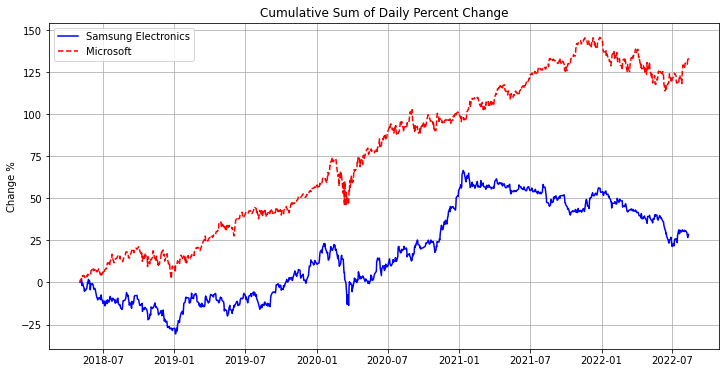

In [3]:
def get_and_cumsum(Ticker, start_date):
    
    df = pdr.get_data_yahoo(Ticker, start= start_date)
    df_dpc = (df.Close / df.Close.shift(1) - 1) * 100  # 일간변동률, Daily Percent Change
    df_dpc.iloc[0] = 0  # 일간변동률 첫번째 값이 NaN이므로 0으로 치환
    df_dpc_cs = df_dpc.cumsum()
    
    return df, df_dpc, df_dpc_cs

start = '2018-05-04'
sec, sec_dpc, sec_dpc_cs = get_and_cumsum('005930.KS', start)
msft, msft_dpc, msft_dpc_cs = get_and_cumsum('MSFT', start)

plt.figure(figsize= (12, 6))
plt.plot(sec.index, sec_dpc_cs, 'b', label= 'Samsung Electronics')
plt.plot(msft.index, msft_dpc_cs, 'r--', label= 'Microsoft')
plt.title('Cumulative Sum of Daily Percent Change')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

[*********************100%***********************]  1 of 1 completed


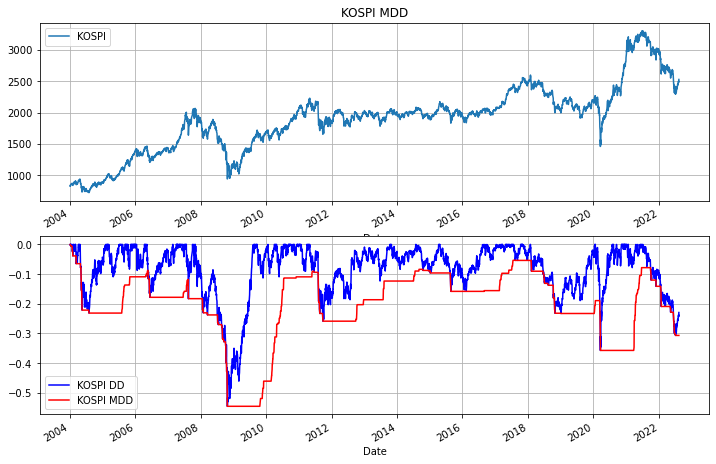

In [4]:
kospi = pdr.get_data_yahoo('^KS11', '2004-01-04')

window = 252
peak = kospi['Adj Close'].rolling(window, min_periods= 1).max()
drawdown = kospi['Adj Close'] / peak - 1
max_dd = drawdown.rolling(window, min_periods= 1).min()

plt.figure(figsize= (12, 8))
plt.subplot(211)
kospi.Close.plot(label= 'KOSPI', title= 'KOSPI MDD', grid= True, legend= True)
plt.subplot(212)
drawdown.plot(c= 'blue', label= 'KOSPI DD', grid= True, legend= True)
max_dd.plot(c= 'red', label= 'KOSPI MDD', grid= True, legend= True)
plt.show()

In [5]:
drawdown[drawdown == drawdown.min()]

Date
2008-10-24   -0.545367
Name: Adj Close, dtype: float64

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


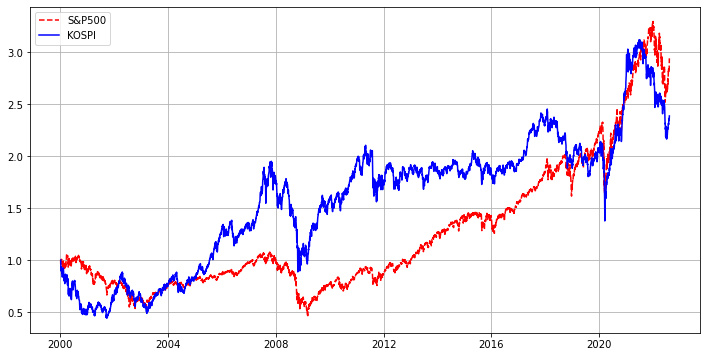

In [9]:
gspc = pdr.get_data_yahoo('^GSPC', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

gspc_st = gspc.Close / gspc.Close[0]
kospi_st = kospi.Close / kospi.Close[0]

plt.figure(figsize= (12, 6))
plt.plot(gspc_st.index, gspc_st, 'r--', label= 'S&P500')
plt.plot(kospi_st.index, kospi_st, 'b', label= 'KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

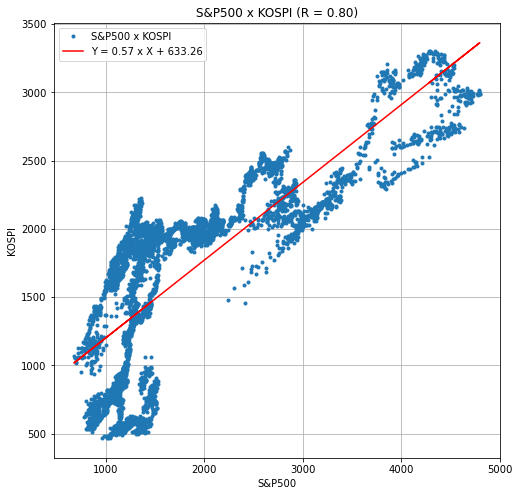

In [24]:
df = pd.DataFrame({'X': gspc.Close, 'Y': kospi.Close})
df.fillna(method= 'bfill', inplace= True)
df.fillna(method= 'ffill', inplace= True)
# fillna 대신 dropna 사용 가능. 단, 이 경우 데이터 유실

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f} x X + {regr.intercept:.2f}'

plt.figure(figsize= (8, 8))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['S&P500 x KOSPI', regr_line])
plt.title(f'S&P500 x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('S&P500')
plt.ylabel('KOSPI')
plt.grid(True)
plt.show()

In [25]:
regr

LinregressResult(slope=0.569172873519487, intercept=633.2605692588033, rvalue=0.7976103239433254, pvalue=0.0, stderr=0.005621762243303929)

In [16]:
df.corr()

,GSPC,KOSPI
GSPC,1.00000,0.79761
KOSPI,0.79761,1.00000


In [19]:
r_value = df.GSPC.corr(df.KOSPI)
r_value

0.7976103239433255

In [20]:
r_squared = r_value ** 2
r_squared

0.6361822288609768